# MexArt-Peak-Detector

In [1]:
# Import 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.4 is required in this notebook
# Earlier 2.x versions will mostly work the same, but with a few bugs
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.04"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

# Algoritmo de deteccion de picos.

Esta seccion es una traduccion de la documentacion de la libreria <a href="https://erdogant.github.io/findpeaks/pages/html/Topology.html">`findpeaks`</a>

## Topologia

El análisis topológico de datos (**TDA**) aplica métodos de topología en el análisis de datos y ha encontrado muchas aplicaciones en la ciencia de datos[<a href='https://www.sthu.org/research/talks/files/fhs-lunchtalk-nov2021-pershom.pdf'>1</a>]. TDA se basa en la observación de que los datos a menudo poseen una cierta forma intrínseca, como la forma de una nube de puntos, la forma de una señal o la forma de un objeto geométrico. La *Homología Persistente* (**HP**) es probablemente la herramienta más destacada del TDA que nos proporciona los medios para describir y cuantificar las propiedades topológicas de estas formas [<a href='https://www.sthu.org/blog/13-perstopology-peakdetection/index.html'>1</a>].

## Homología Persistente

En topología computacional, la idea de homología persistente conduce a una solución eficiente, rápida como ordenar números. No sólo detecta picos, sino que cuantifica la "importancia" de los picos de una forma natural que permite seleccionar los picos que son significativos para uno[<a href="https://stackoverflow.com/questions/22583391/peak-signal-detection-in-realtime-timeseries-data/46680769#46680769">2</a>]. La idea de homología persistente es intuitiva: Consideremos el gráfico de la función que asigna a cada píxel su nivel. Su aspecto es el siguiente

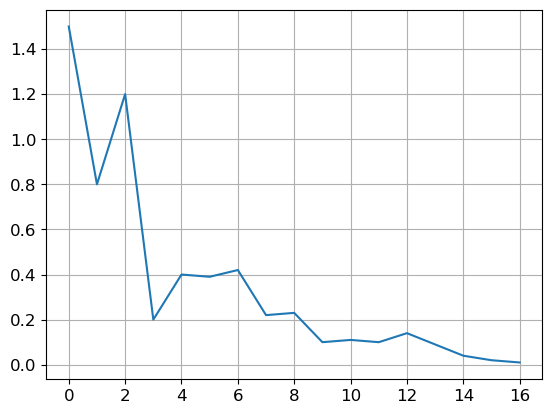

In [2]:
# Importamos la libreria de findpeaks
from findpeaks import findpeaks
# Initializamos la funcion de detecion de picos
fp = findpeaks(method='topology')
# Cargamos un vector ejemplo de 1-dimensión
X = fp.import_example('1dpeaks')
# Graficamos
plt.plot(X); plt.grid(True)

Consideremos ahora un nivel de agua que desciende continuamente a niveles inferiores. En los máximos locales surgen islas (***nacimiento***). En los puntos de ensilladura, dos islas se fusionan; consideramos que la isla inferior se fusiona con la isla superior (***muerte***). El llamado diagrama de persistencia (de las clases de homología de dimensión 0, nuestras islas) representa los valores de muerte sobre nacimiento de todas las islas:

[findpeaks] >Finding peaks in 1d-vector using [topology] method..
[findpeaks] >Detect peaks using topology method with limit at None.


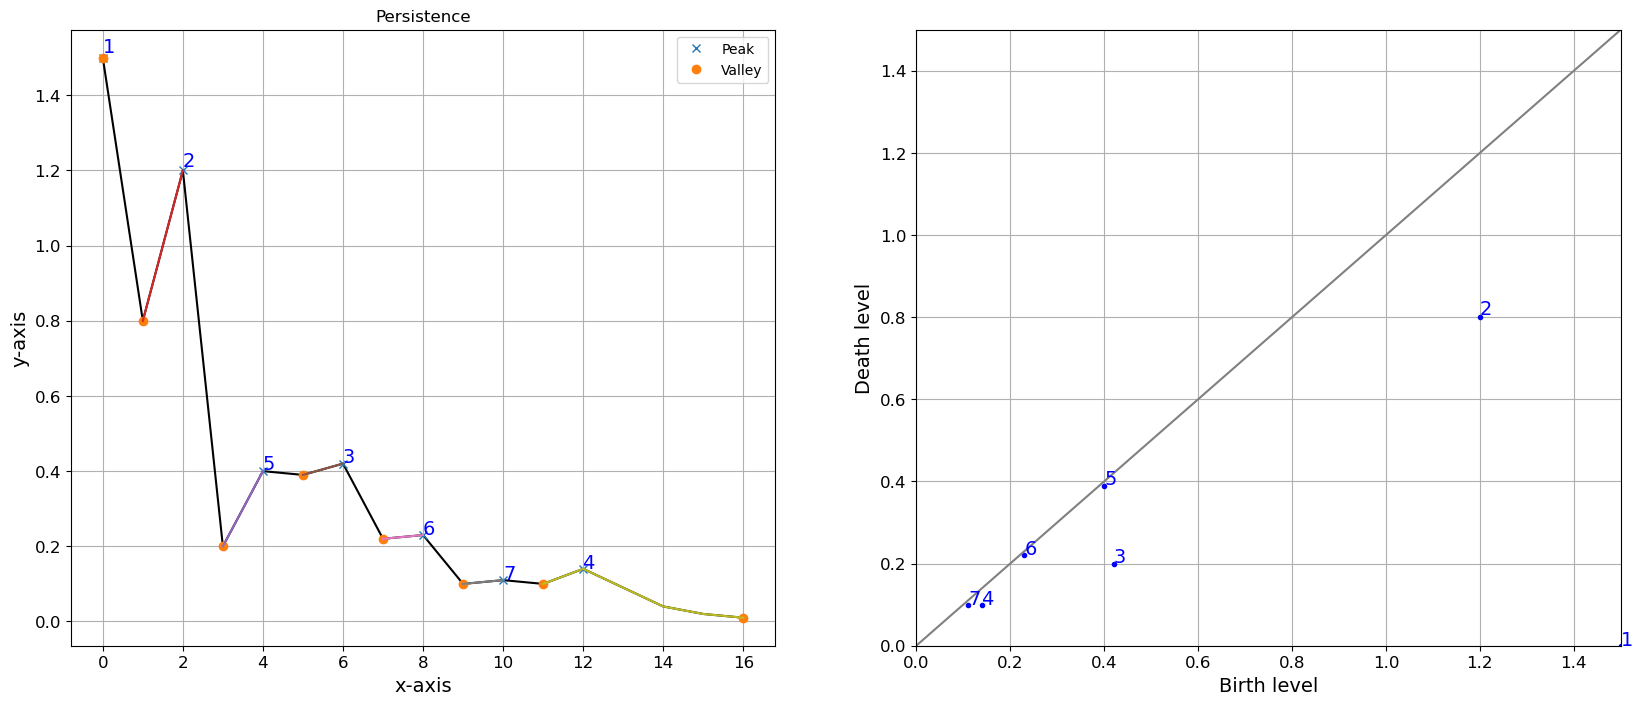

(<Axes: title={'center': 'Persistence'}, xlabel='x-axis', ylabel='y-axis'>,
 <Axes: xlabel='Birth level', ylabel='Death level'>)

In [3]:
# Aplicamos el algoritmo de persistencia homologica en el vector de ejemplo
results = fp.fit(X)
# graficamos los resultados
fp.plot_persistence()

La ***persistencia*** de una isla es entonces la diferencia entre el nivel de nacimiento y el nivel de muerte; la distancia vertical de un punto a la diagonal principal gris. La figura etiqueta las islas por persistencia decreciente. La figura de la derecha muestra las ubicaciones de los nacimientos de las islas. Este método no sólo da los máximos locales, sino que también cuantifica su "importancia" por la persistencia antes mencionada. De este modo, se filtrarían todas las islas con una persistencia demasiado baja, es decir, las situadas en la diagonal.

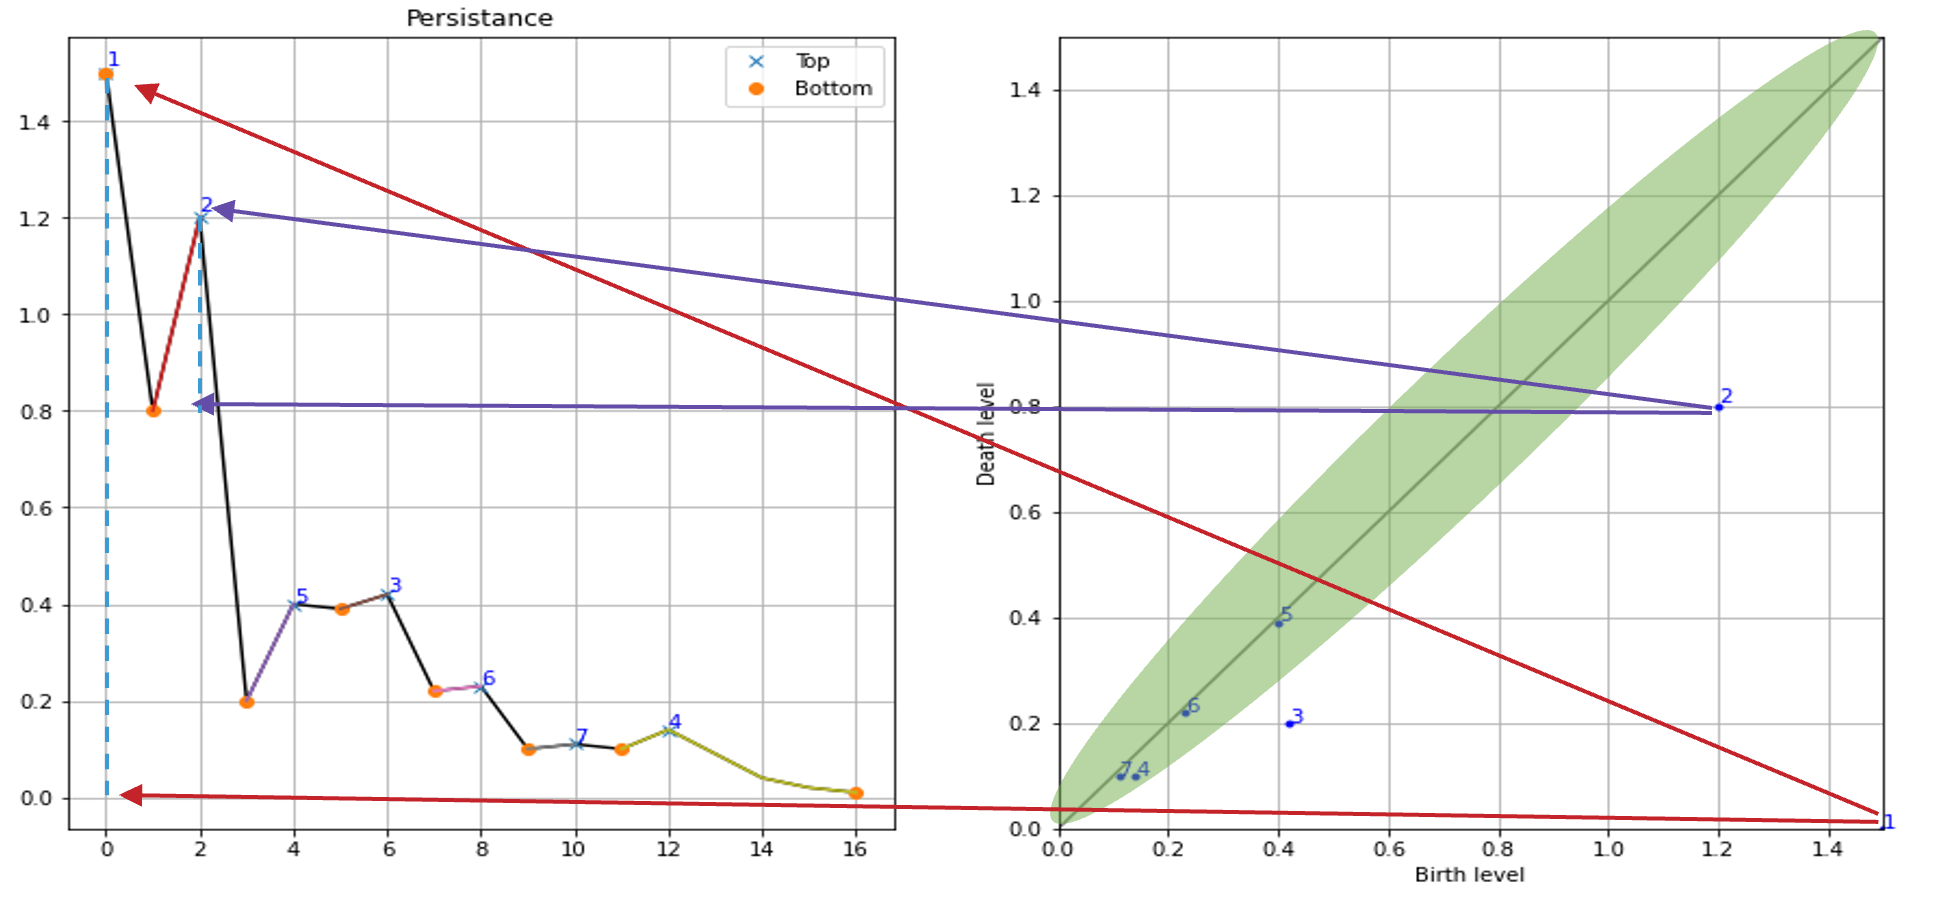

## Eficiencia

El método topológico está implementado de tal manera que se ejecuta en tiempo lineal -de hecho es un único bucle simple- después de ordenar los valores de las funciones. La complejidad temporal es $O(n \log n)$. Así que esta implementación debería ser rápida en la práctica y es fácil de implementar. La implementación original estaba en Python 2.7 [<a href="https://git.sthu.org/?p=persistence.git">4</a>], pero en `findpeaks` está (ligeramente) ajustada y reescrita para python 3.

# Uno-dimensional

La inicialización contiene muchas variables de las cuales sólo unas pocas son aplicables para el método de topología. Los parámetros generales son `figsize` y `verbose` que sirven para establecer el tamaño de la figura e imprimir mensajes en la pantalla. Específicamente para el método de topología, el método debe establecerse en "`topology`", y además, los parámetros `interpolate` y `limit` pueden utilizarse para algunos ajustes de preprocesamiento y salida. Por defecto, no se aplica interpolación y no hay límite en los resultados finales. Vea aquí los detalles <a href="https://erdogant.github.io/findpeaks/pages/html/findpeaks.findpeaks.html#findpeaks.findpeaks.findpeaks">`findpeaks.findpeaks.findpeaks()`</a>

In [4]:
# Importamos la libreria
from findpeaks import findpeaks
# Initializamos
fp = findpeaks(method='topology', interpolate=None, limit=None, figsize=(15, 8), verbose=3)
# Fit topology method on the 1d-vector
results = fp.fit(X)
# The output contains multiple variables
print(results.keys())
# dict_keys(['persistence', 'Xdetect', 'Xranked', 'groups0', 'df'])

[findpeaks] >Finding peaks in 1d-vector using [topology] method..
[findpeaks] >Detect peaks using topology method with limit at None.
dict_keys(['persistence', 'Xdetect', 'Xranked', 'groups0', 'df'])


La salida es un diccionario que contiene múltiples variables que pueden ser de utilidad para el análisis posterior. Véase: <a href="https://erdogant.github.io/findpeaks/pages/html/findpeaks.findpeaks.html#findpeaks.findpeaks.findpeaks.peaks1d">findpeaks.findpeaks.findpeaks.peaks1d()</a> Tenga en cuenta que este DataFrame NO se filtra en la variable límite, ya que debe estar en consonancia con el conjunto de datos de entrada.

In [5]:
# Print results to screen
results['df']

,x,y,labx,rank,score,valley,peak
0,0,1.50,1.0,1,1.50,True,True
1,1,0.80,2.0,0,0.00,True,False
2,2,1.20,2.0,2,0.40,False,True
3,3,0.20,3.0,0,0.00,True,False
4,4,0.40,3.0,5,0.01,False,True
5,5,0.39,4.0,0,0.00,True,False
6,6,0.42,4.0,3,0.22,False,True
7,7,0.22,5.0,0,0.00,True,False
8,8,0.23,5.0,6,0.01,False,True
9,9,0.10,6.0,0,0.00,True,False



<dt>Para la persistencia homologica, el dataframe <code>persistence</code> contiene:</dt><dd><ul class="simple">
    <li><p>x, y    : coordenadas</p></li>
    <li><p>birth   : Nivel de nacimiento</p></li>
    <li><p>death   : Nivel de muerte</p></li>
    <li><p>score   : Score de persistencia</p></li>
</ul>
</dd>


In [6]:
results['persistence']

,x,y,birth_level,death_level,score
0,0,0,1.50,0.00,1.50
1,0,2,1.20,0.80,0.40
2,0,6,0.42,0.20,0.22
3,0,12,0.14,0.10,0.04
4,0,4,0.40,0.39,0.01
5,0,8,0.23,0.22,0.01
6,0,10,0.11,0.10,0.01


El parámetro de entrada `limit` filtrará los resultados basándose en la puntuación del `score`, y mantendrá sólo aquellos con `score`>`limit`. La limitación resulta muy útil cuando los datos son ruidosos y se detectan muchos picos a lo largo de la diagonal. Fijemos el límite en `limit=0,0101` y comprobemos los resultados:

In [7]:
fp = findpeaks(method='topology', interpolate=None, limit=0.0101, verbose=5)
results = fp.fit(X)
# Print results to screen
results['persistence']

[findpeaks] >Finding peaks in 1d-vector using [topology] method..
[findpeaks] >Detect peaks using topology method with limit at 0.0101.


34it [00:00, 25383.83it/s]


,x,y,birth_level,death_level,score
0,0,0,1.50,0.0,1.50
1,0,2,1.20,0.8,0.40
2,0,6,0.42,0.2,0.22
3,0,12,0.14,0.1,0.04


El parámetro de entrada "`interpolate`" extiende los datos por este factor y sirve para "suavizar" la señal mediante una interpolación lineal. Una señal suavizada puede ser más robusta frente al ruido y ofrecer mejores resultados en la detección de picos y valles. Este paso puede considerarse una etapa de preprocesamiento antes de aplicar cualquier método. Los resultados se basan en los datos interpolados y se remiten a los datos de entrada originales. En este caso, los resultados son muy similares a los obtenidos sin interpolación. Sin embargo, las puntuaciones de persistencia son ligeramente diferentes.

Veámoslo con un ejemplo:

In [8]:
# Import library
from findpeaks import findpeaks
# Initialize with interpolation
fp = findpeaks(method='topology', interpolate=10, limit=None)
# Fit topology method on the interpolated 1d-vector
results = fp.fit(X)
# The results for the interpolated data.
results['persistence']

[findpeaks] >Finding peaks in 1d-vector using [topology] method..
[findpeaks] >Interpolating 1d-vector by factor 10
[findpeaks] >Detect peaks using topology method with limit at None.


,x,y,birth_level,death_level,score
0,0,0,1.500000,0.000000,1.500000
1,0,19,1.229994,0.800000,0.429994
2,0,60,0.433313,0.124612,0.308701
3,0,126,0.140000,0.091063,0.048937
4,0,45,0.431017,0.390000,0.041017
5,0,82,0.233771,0.203954,0.029817
6,0,106,0.110521,0.097933,0.012588


# Ejemplo en datos del Mexart

In [9]:
# Ruta de los datos del mexart
file = '/home/javier/Documentos/datos_MEXART/datos_2018/2018-01-01/2018-01-01-000101.chan-1.TMSERIES.txt'
# Initialize empty lists to store data
time = []
X = []

# Open the file in read mode
with open(file, 'r') as file:
    # Iterate through each line in the file
    for line in file:
        # Ignore lines starting with "#" as they are comments
        if not line.startswith('#'):
            # Split the line into columns based on whitespace
            columns = line.split()
            # Extract data from the first and second columns
            time_value = float(columns[0])  # Assuming time values are floats
            X_value = float(columns[1])     # Assuming X values are floats
            # Append the values to their respective lists
            time.append(time_value)
            X.append(X_value)

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


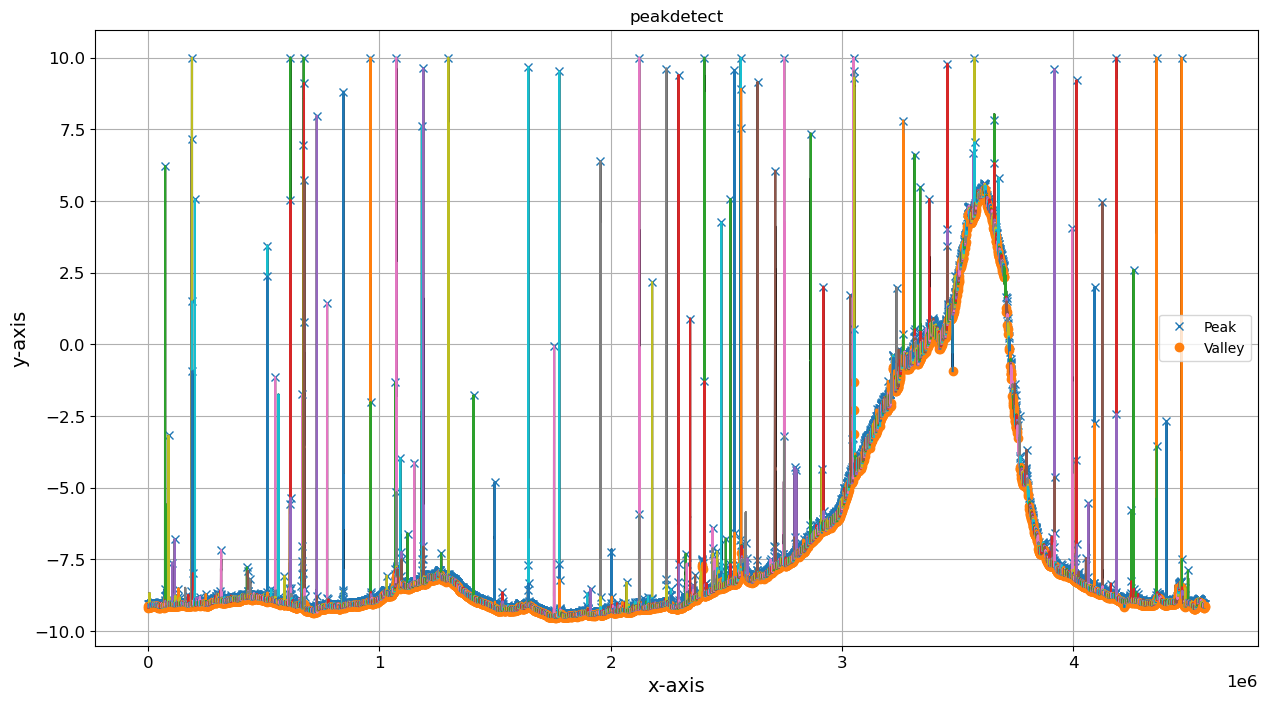

(None,
 <Axes: title={'center': 'peakdetect'}, xlabel='x-axis', ylabel='y-axis'>)

In [10]:
# Import library
from findpeaks import findpeaks
# Initialize
fp = findpeaks(method='peakdetect', lookahead=500, interpolate=None)

# Example 1d-vector
i = 10000
xs = np.linspace(0,3.7*np.pi,i)
# X = (0.3*np.sin(xs) + np.sin(1.3 * xs) + 0.9 * np.sin(4.2 * xs) + 0.06 * np.random.randn(i))

# Fit topology method on the 1d-vector
results = fp.fit(X)
# Plot
fp.plot()


In [18]:
df = results['df']
peaks = df[df['peak'] == True]
peaks.shape[0]

4609